In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Coleta de dados
salario_recebido = pd.read_csv('/content/salario_recebido.csv', sep=';')

In [ ]:
# Análise dos dados

## Visualização dos arquivos da base de dados
salario_recebido.head()

,dias_folga,salario_recebido
0,1,4833
1,2,5358
2,3,4500
3,4,4200
4,5,4167


In [ ]:
## Gerando estatísticas
salario_recebido.describe()

,dias_folga,salario_recebido
count,25.000000,25.000000
mean,14.360000,2767.840000
std,8.783887,1473.826643
min,1.000000,167.000000
25%,7.000000,1600.000000
50%,14.000000,2610.000000
75%,21.000000,3750.000000
max,29.000000,5358.000000


In [ ]:
## Verificando existência de valor nulo ou ausente
salario_recebido.isna().sum()

dias_folga          0
salario_recebido    0
dtype: int64

In [ ]:
## Verificando informações da base de dados
salario_recebido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   dias_folga        25 non-null     int64
 1   salario_recebido  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [ ]:
# Análise de correlação entre as variáveis
salario_recebido.corr()

,dias_folga,salario_recebido
dias_folga,1.000000,-0.974192
salario_recebido,-0.974192,1.000000


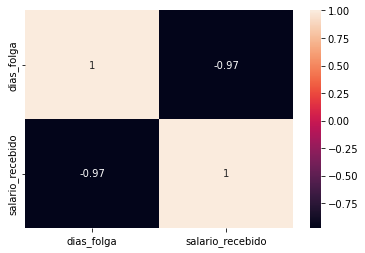

In [ ]:
# Análise gráfica da correlação entre as variáveis
correlacao = salario_recebido.corr()
sns.heatmap(correlacao, annot = True)

In [ ]:
# Tratamento de dados

## Criando variável independente X
X = salario_recebido.iloc[:, 0].values
print(X)

[ 1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 19 20 21 22 24 26 27 28
 29]


In [ ]:
## Criando variável dependente y
y = salario_recebido.iloc[:, 1].values
print(y)

[4833 5358 4500 4200 4167 4555 3750 3667 3662 3333 3167 3603 2600 2333
 2610 2000 1833 1600 1500 2478 1000  667 1280  333  167]


In [ ]:
# verificando tipo de variáveis
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(25,)

In [ ]:
# Transformando array em matriz
X = X.reshape(-1, 1)

In [ ]:
X.shape

(25, 1)

In [ ]:
# CRIANDO MODELO DE MACHINE LEARNING
from sklearn.linear_model import LinearRegression
predicao_salario_recebido = LinearRegression()

In [ ]:
type(predicao_salario_recebido)

sklearn.linear_model._base.LinearRegression

In [ ]:
## Treinamento do modelo
predicao_salario_recebido.fit(X, y)

LinearRegression()

In [ ]:
## Constante alfa - intercept
predicao_salario_recebido.intercept_

5115.085821056725

In [ ]:
## Coeficiente angular a da reta - coef
predicao_salario_recebido.coef_

array([-163.45722988])

In [ ]:
# Predição dos salários recebidos
previsao_valores = predicao_salario_recebido.predict(X)

In [ ]:
## Visualização das previsões para cada dia de folga
previsao_valores

array([4951.62859118, 4788.1713613 , 4624.71413142, 4461.25690154,
       4297.79967166, 4134.34244179, 3970.88521191, 3807.42798203,
       3643.97075215, 3480.51352227, 3317.05629239, 3153.59906251,
       2826.68460276, 2499.770143  , 2336.31291312, 2172.85568324,
       2009.39845336, 1845.94122348, 1682.48399361, 1519.02676373,
       1192.11230397,  865.19784421,  701.74061433,  538.28338446,
        374.82615458])

In [ ]:
# Visualização gráfica das disposições dos dados
## Gráfico 1
grafico = px.scatter(x = X.ravel(), y = y)
grafico.show()

In [ ]:
## Gráfico 2
grafico = px.scatter(x = X.ravel(), y = y)
grafico.add_scatter(x = X.ravel(), y = previsao_valores, name = 'previsões')
grafico.show()

In [ ]:
# Verificando os valores de uma determinada previsão baseada nos dias de folga
alfa = predicao_salario_recebido.intercept_
beta = predicao_salario_recebido.coef_
Xi = 4

alfa + beta * Xi

array([4461.25690154])

In [ ]:
# Calculando o salário recebido através da função predict do modelo
## Modo direto
predicao_salario_recebido.predict([[15]])

array([2663.22737288])

In [ ]:
# Avaliação do modelo
## Acurácia do modelo
predicao_salario_recebido.score(X, y)

0.949049620516577

In [ ]:
# Mean absolute error
mean_absolute_error(y, previsao_valores)

261.5068872856094

In [ ]:
# Mean squared error
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

106245.72450425537


In [ ]:
# Root Mean squared error
np.sqrt(MSE)

325.9535618830624